In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the csv file
df=pd.read_csv('C:/Users/Admin/Downloads/train.csv')

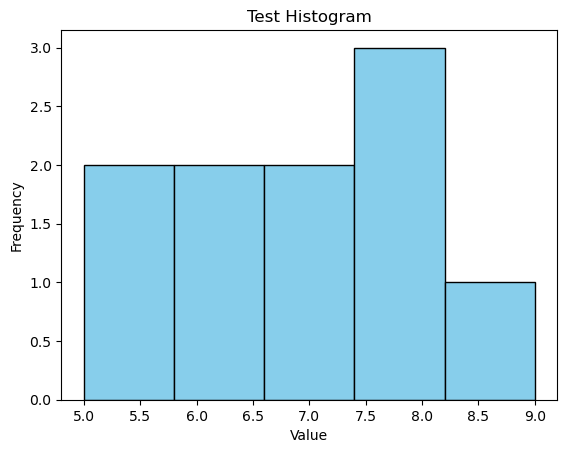

In [3]:
#sample check
import matplotlib.pyplot as plt

# Sample data
data = [5, 7, 8, 5, 6, 8, 9, 6, 7, 8]

# Simple histogram
plt.hist(data, bins=5, color="skyblue", edgecolor="black")
plt.title("Test Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

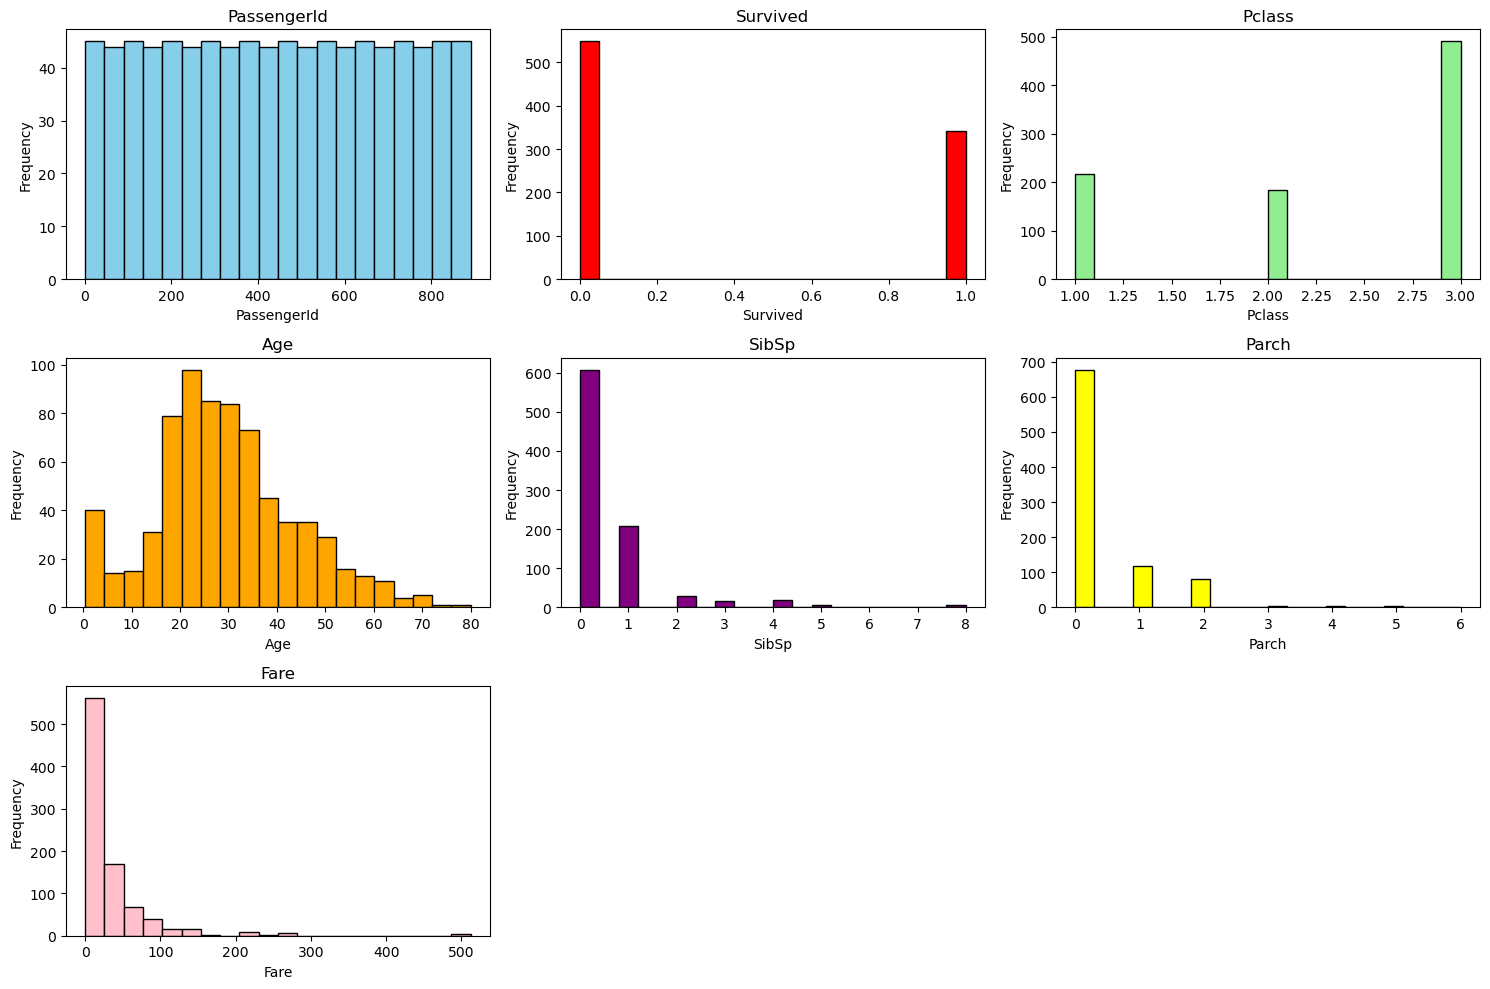

In [4]:
#QUESTION 1

import matplotlib.pyplot as plt

# Select only numeric columns
numeric_cols = df.select_dtypes(include=["number"]).columns

# Colors list
colors = ["skyblue", "red", "lightgreen", "orange", "purple", "yellow", "pink"]

plt.figure(figsize=(15, 10))

# Loop through each numeric column
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i + 1)  # Adjust grid size as needed
    plt.hist(df[col].dropna(), bins=20, color=colors[i % len(colors)], edgecolor='black')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

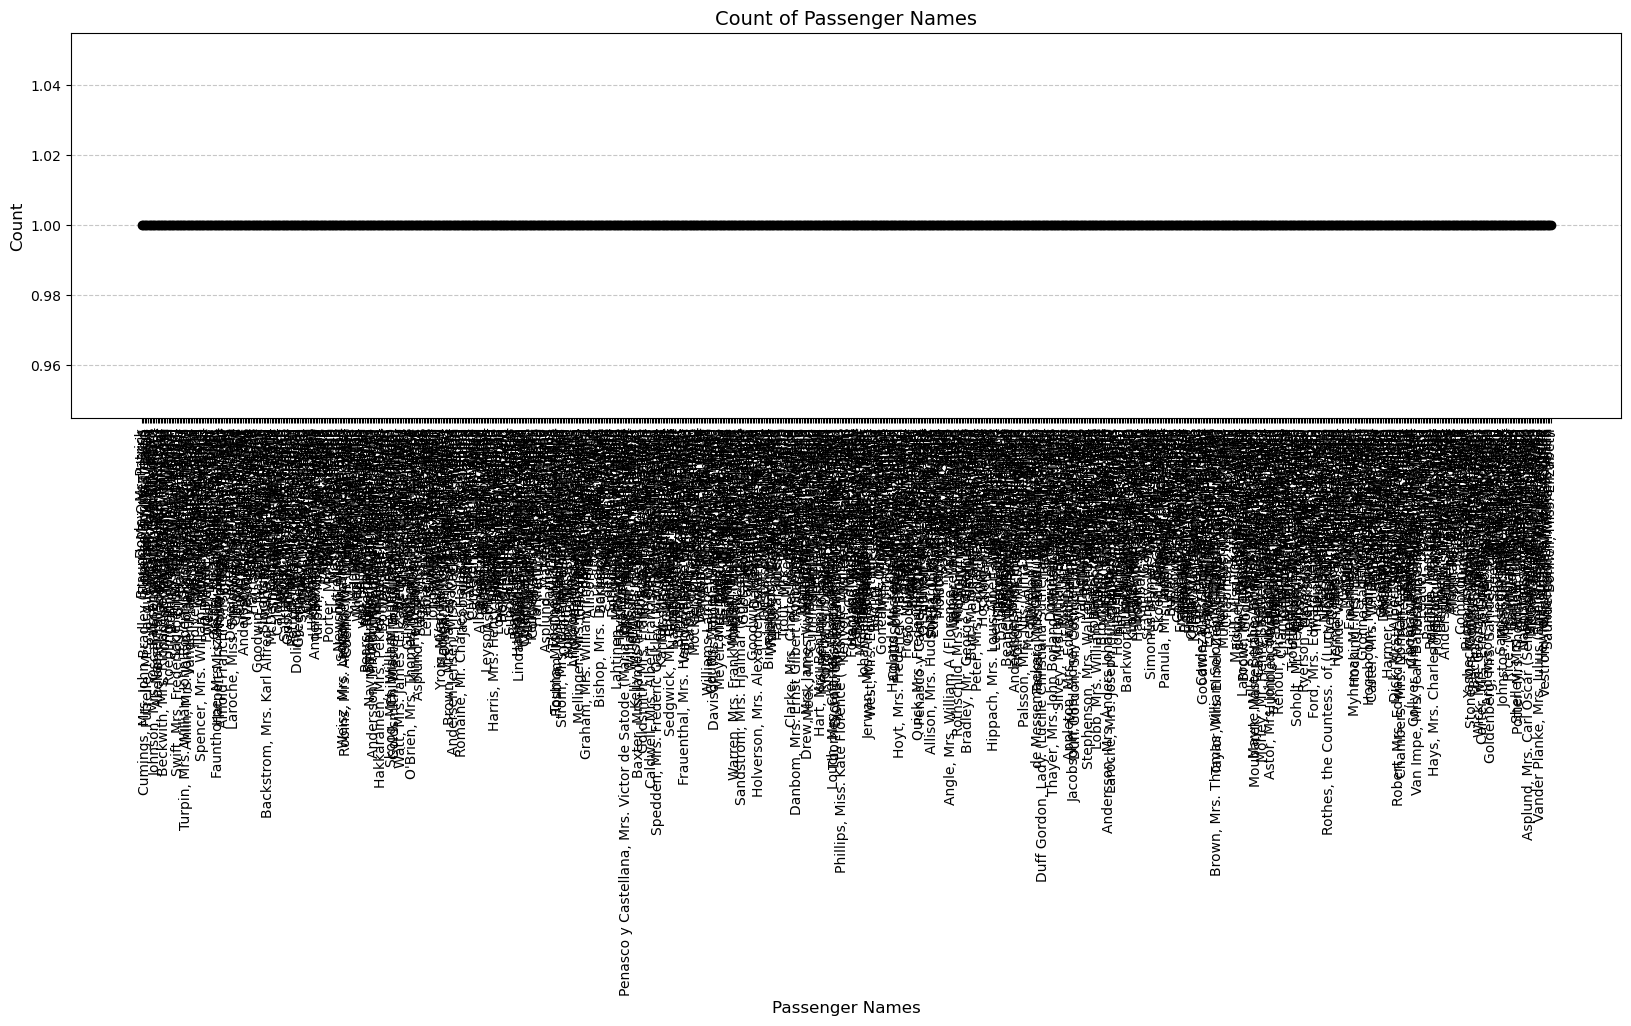

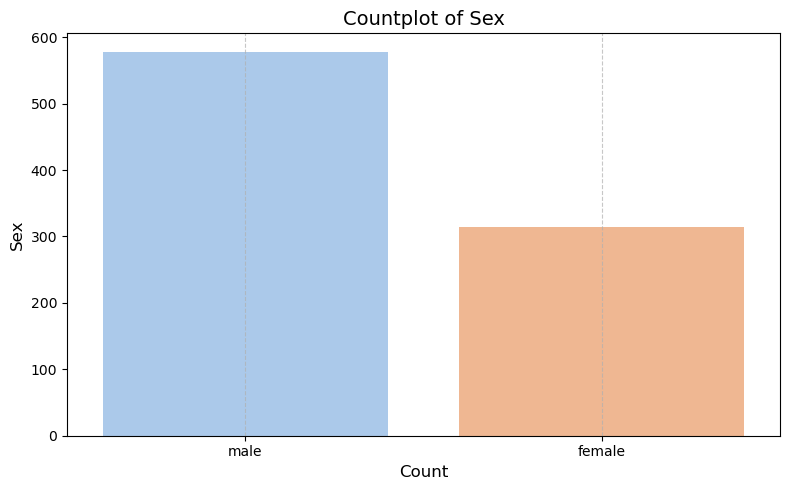

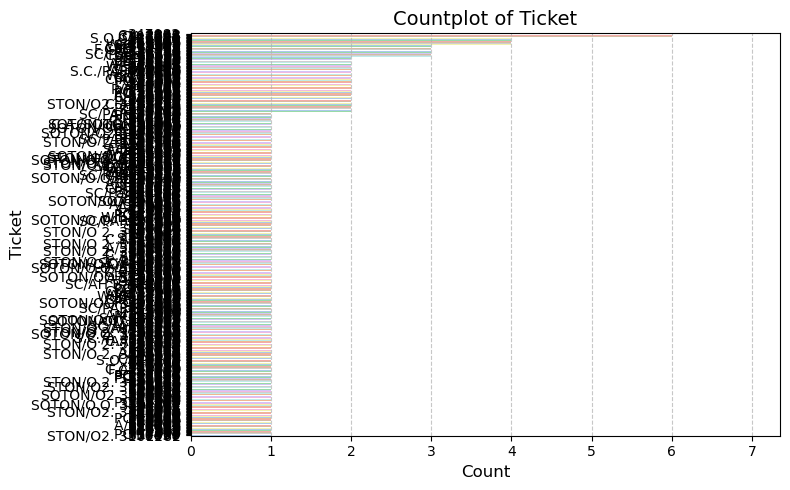

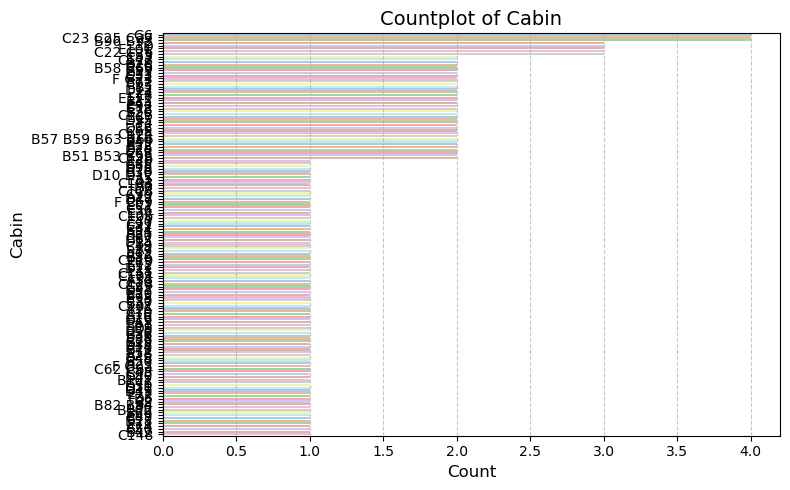

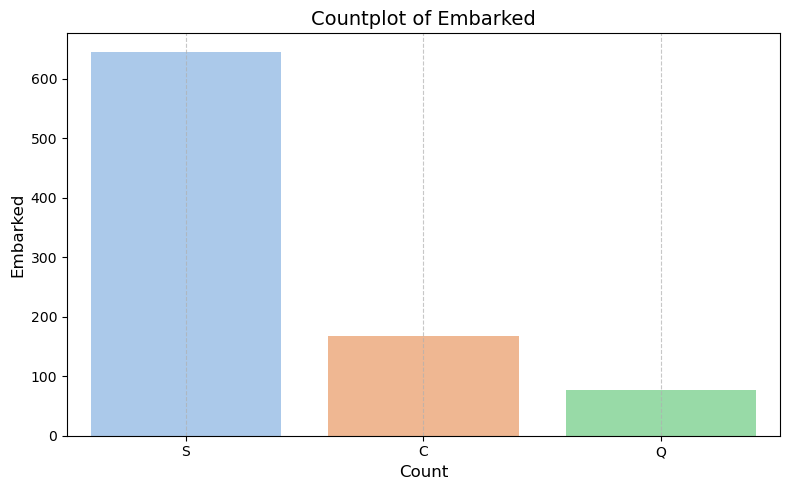

In [5]:
#QUESTION 2
import seaborn as sns
import matplotlib.pyplot as plt

# Get categorical columns
categorical_cols = df.select_dtypes(include="object").columns

# --- 1. Special chart for 'Name' ---
name_counts = df['Name'].value_counts()

plt.figure(figsize=(20, 5))
plt.plot(range(len(name_counts)), name_counts.values, 'o', color='black')  # Dots instead of bars
plt.xticks(range(len(name_counts)), name_counts.index, rotation=90)
plt.xlabel("Passenger Names", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Count of Passenger Names", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- 2. Countplots for remaining categorical columns ---
other_cats = [col for col in categorical_cols if col != "Name"]

for col in other_cats:
    plt.figure(figsize=(8, 5))
    if df[col].nunique() > 5:  # If too many unique values → horizontal bar
        sns.countplot(data=df, y=col, palette="pastel", order=df[col].value_counts().index)
    else:  # Otherwise → vertical bar
        sns.countplot(data=df, x=col, palette="pastel", order=df[col].value_counts().index)
    plt.title(f"Countplot of {col}", fontsize=14)
    plt.xlabel("Count", fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

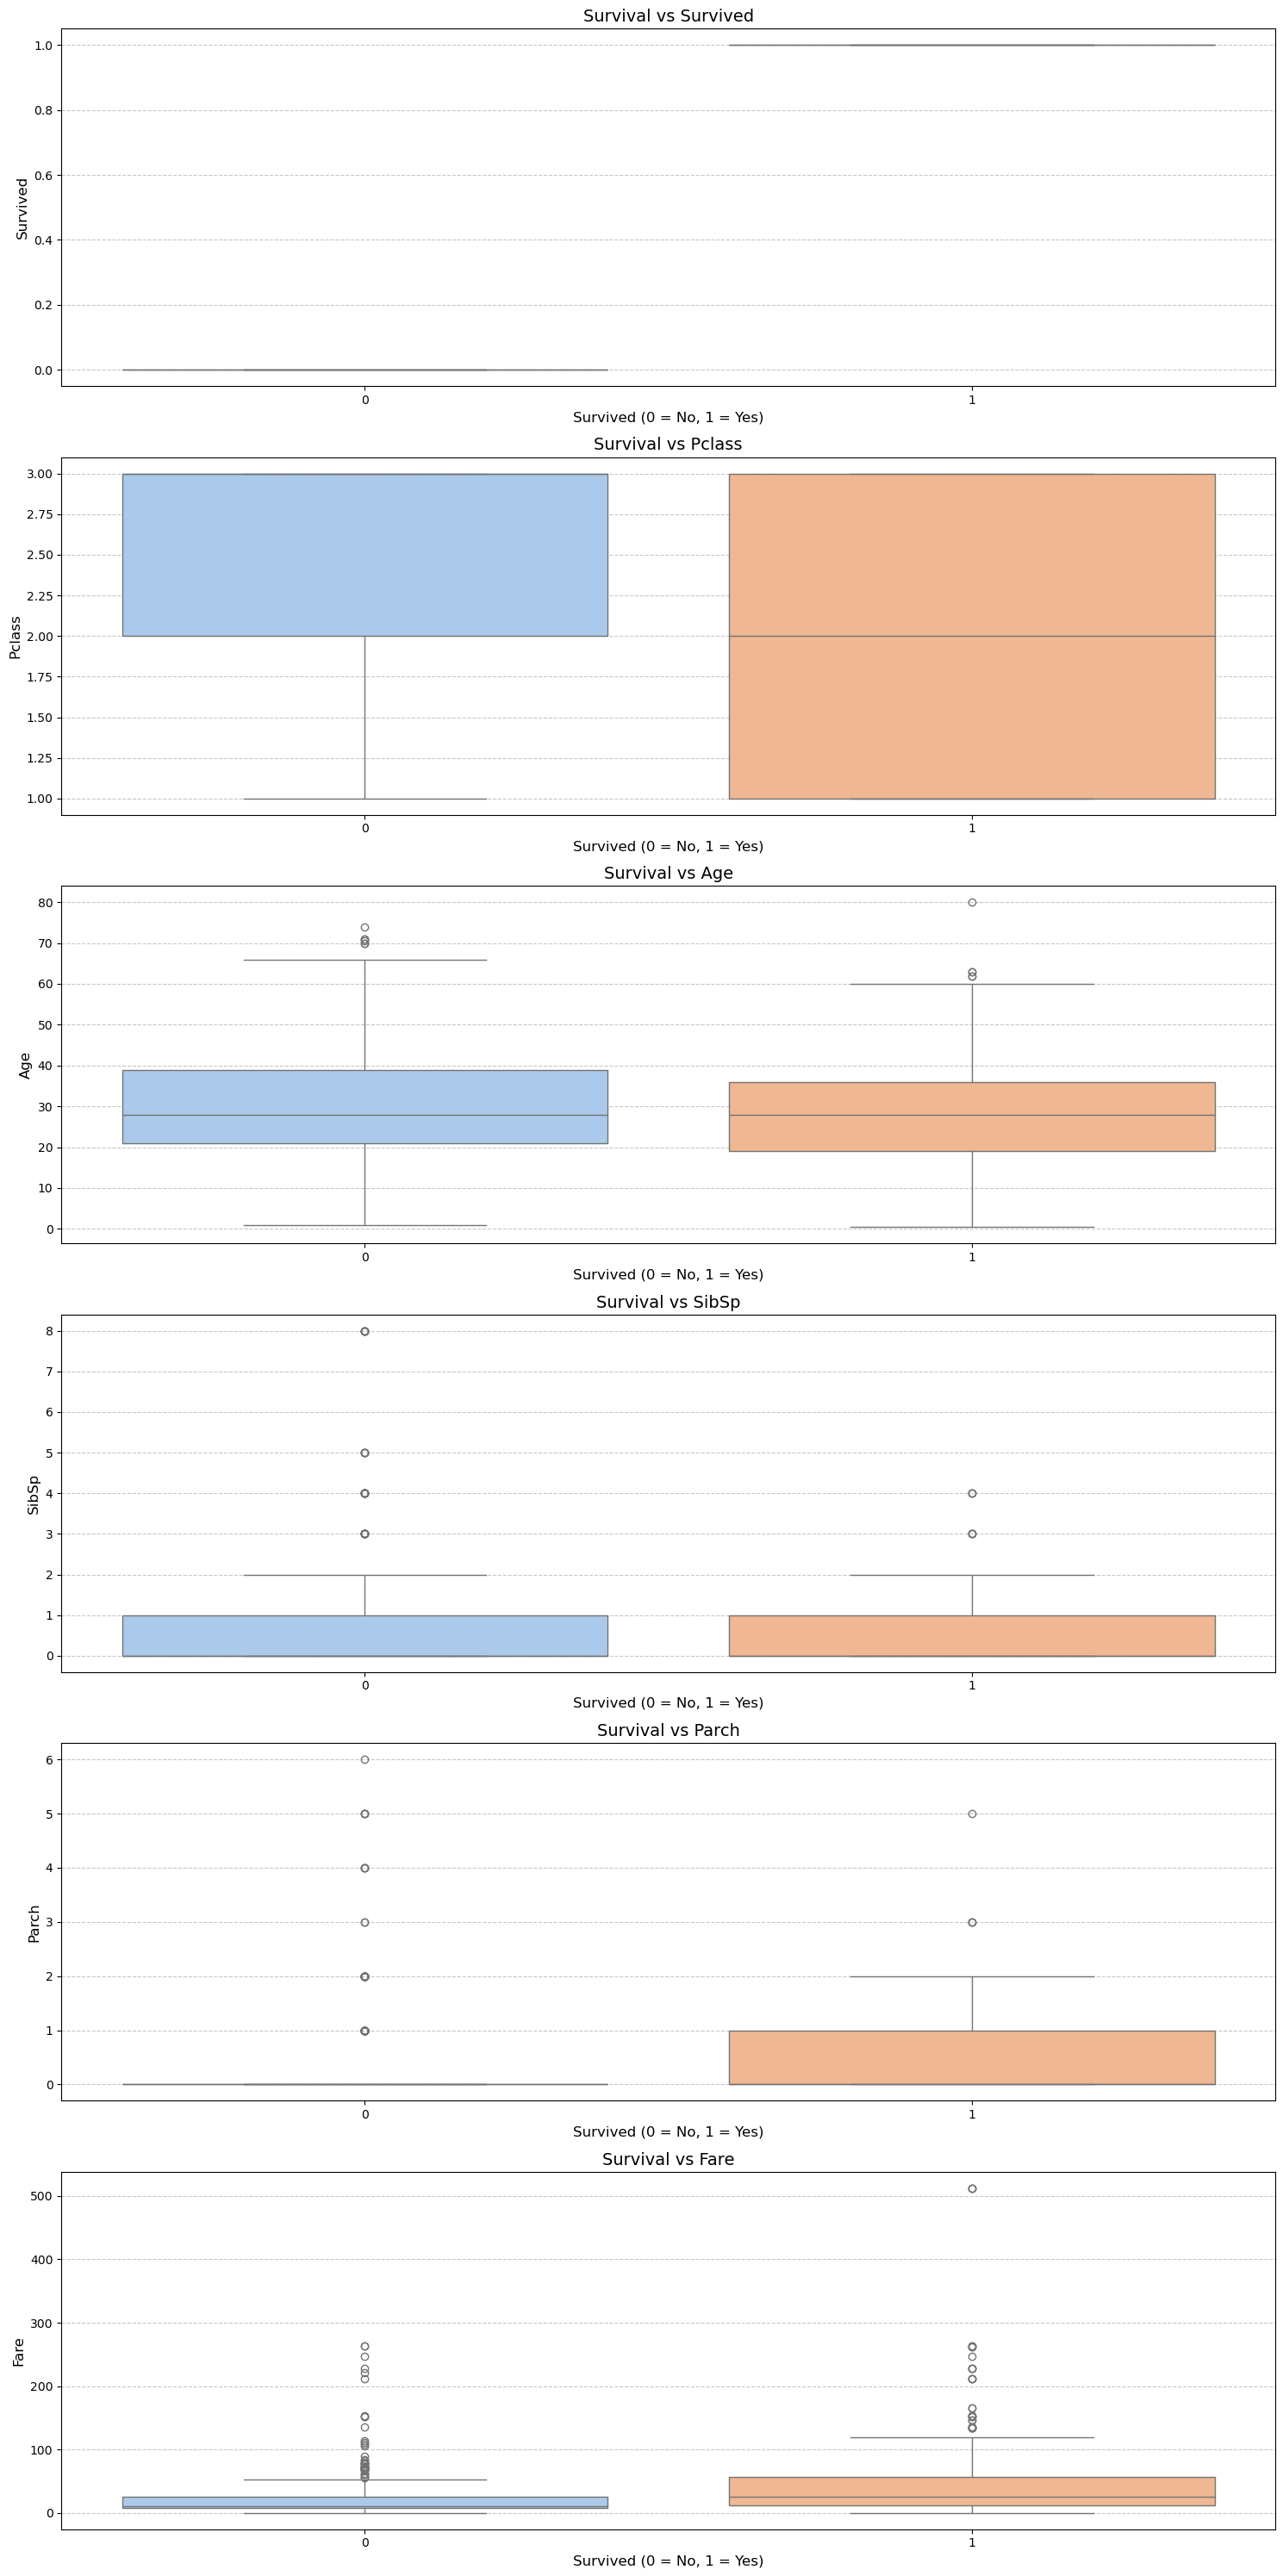

In [6]:
#QUESTION 3
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns (excluding PassengerId because it’s just an index)
numeric_cols = [col for col in df.select_dtypes(include="number").columns if col != "PassengerId"]

plt.figure(figsize=(15, 5 * len(numeric_cols)))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(data=df, x='Survived', y=col, palette="pastel")
    plt.title(f"Survival vs {col}", fontsize=14)
    plt.xlabel("Survived (0 = No, 1 = Yes)", fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

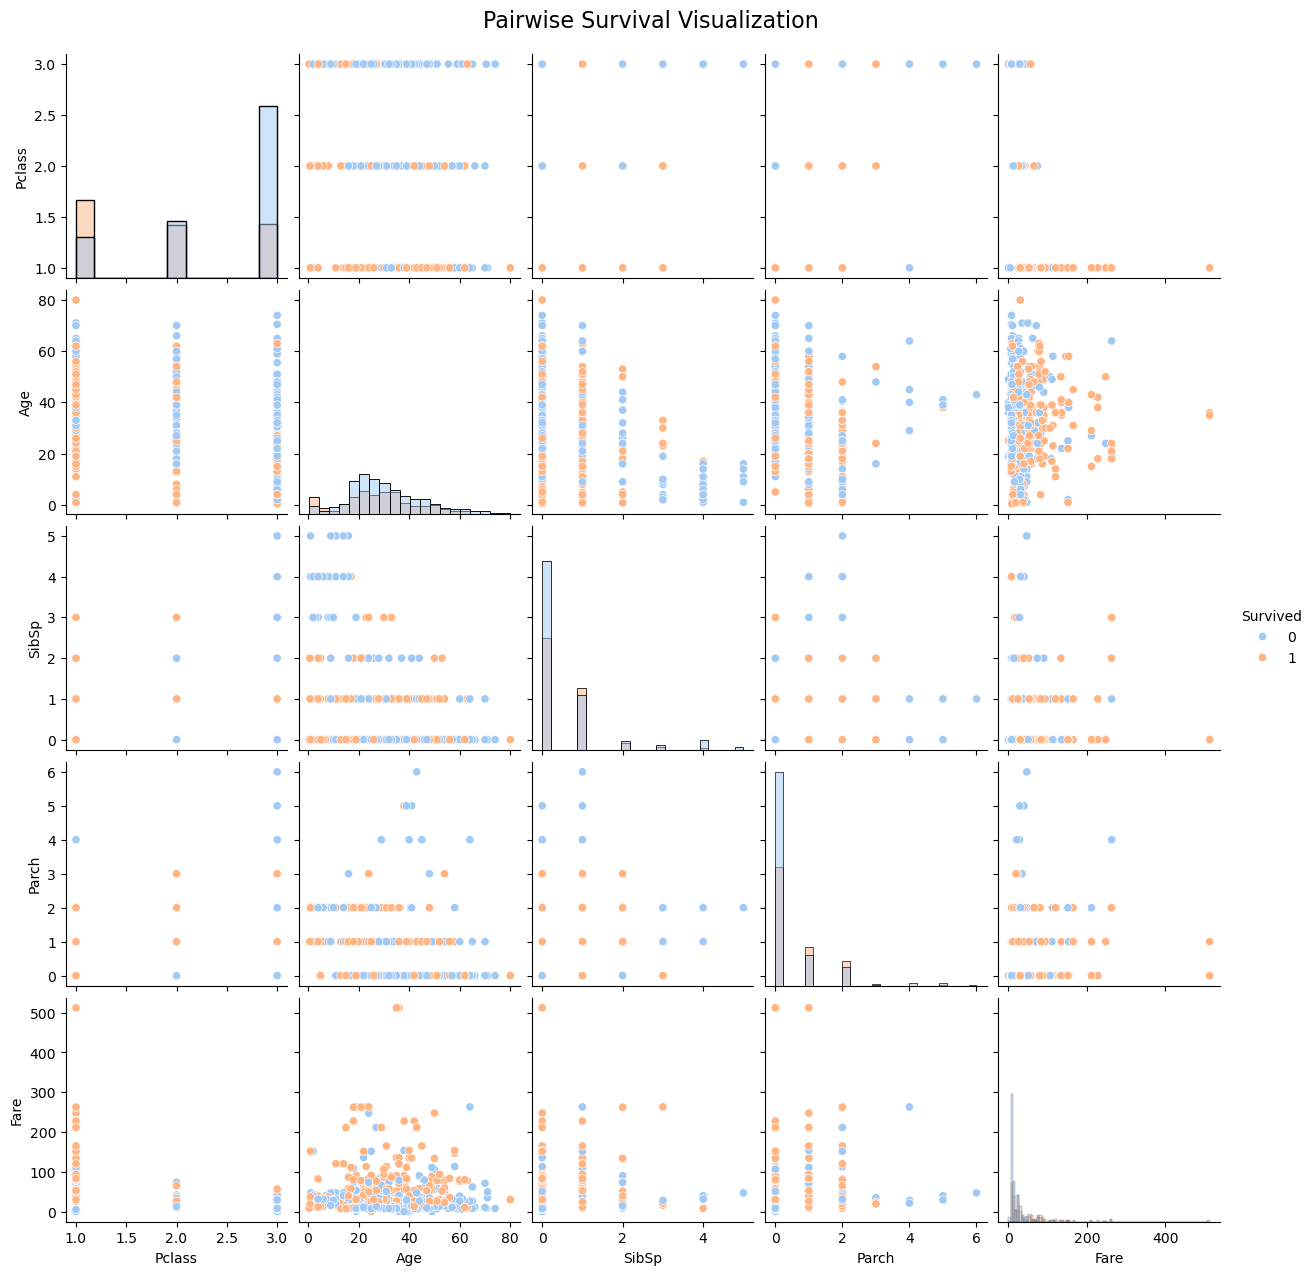

In [7]:
#QUESTION 4
import seaborn as sns
import matplotlib.pyplot as plt

# Convert Survived to categorical
df['Survived'] = df['Survived'].astype(str)

# Select numeric columns excluding PassengerId
numeric_cols = [col for col in df.select_dtypes(include="number").columns if col != "PassengerId"]

# Drop rows with NaN in selected columns
pairplot_data = df[numeric_cols + ['Survived']].dropna()

# Create pairplot
sns.pairplot(pairplot_data, hue="Survived", palette="pastel", diag_kind="hist")

plt.suptitle("Pairwise Survival Visualization", y=1.02, fontsize=16)
plt.show()

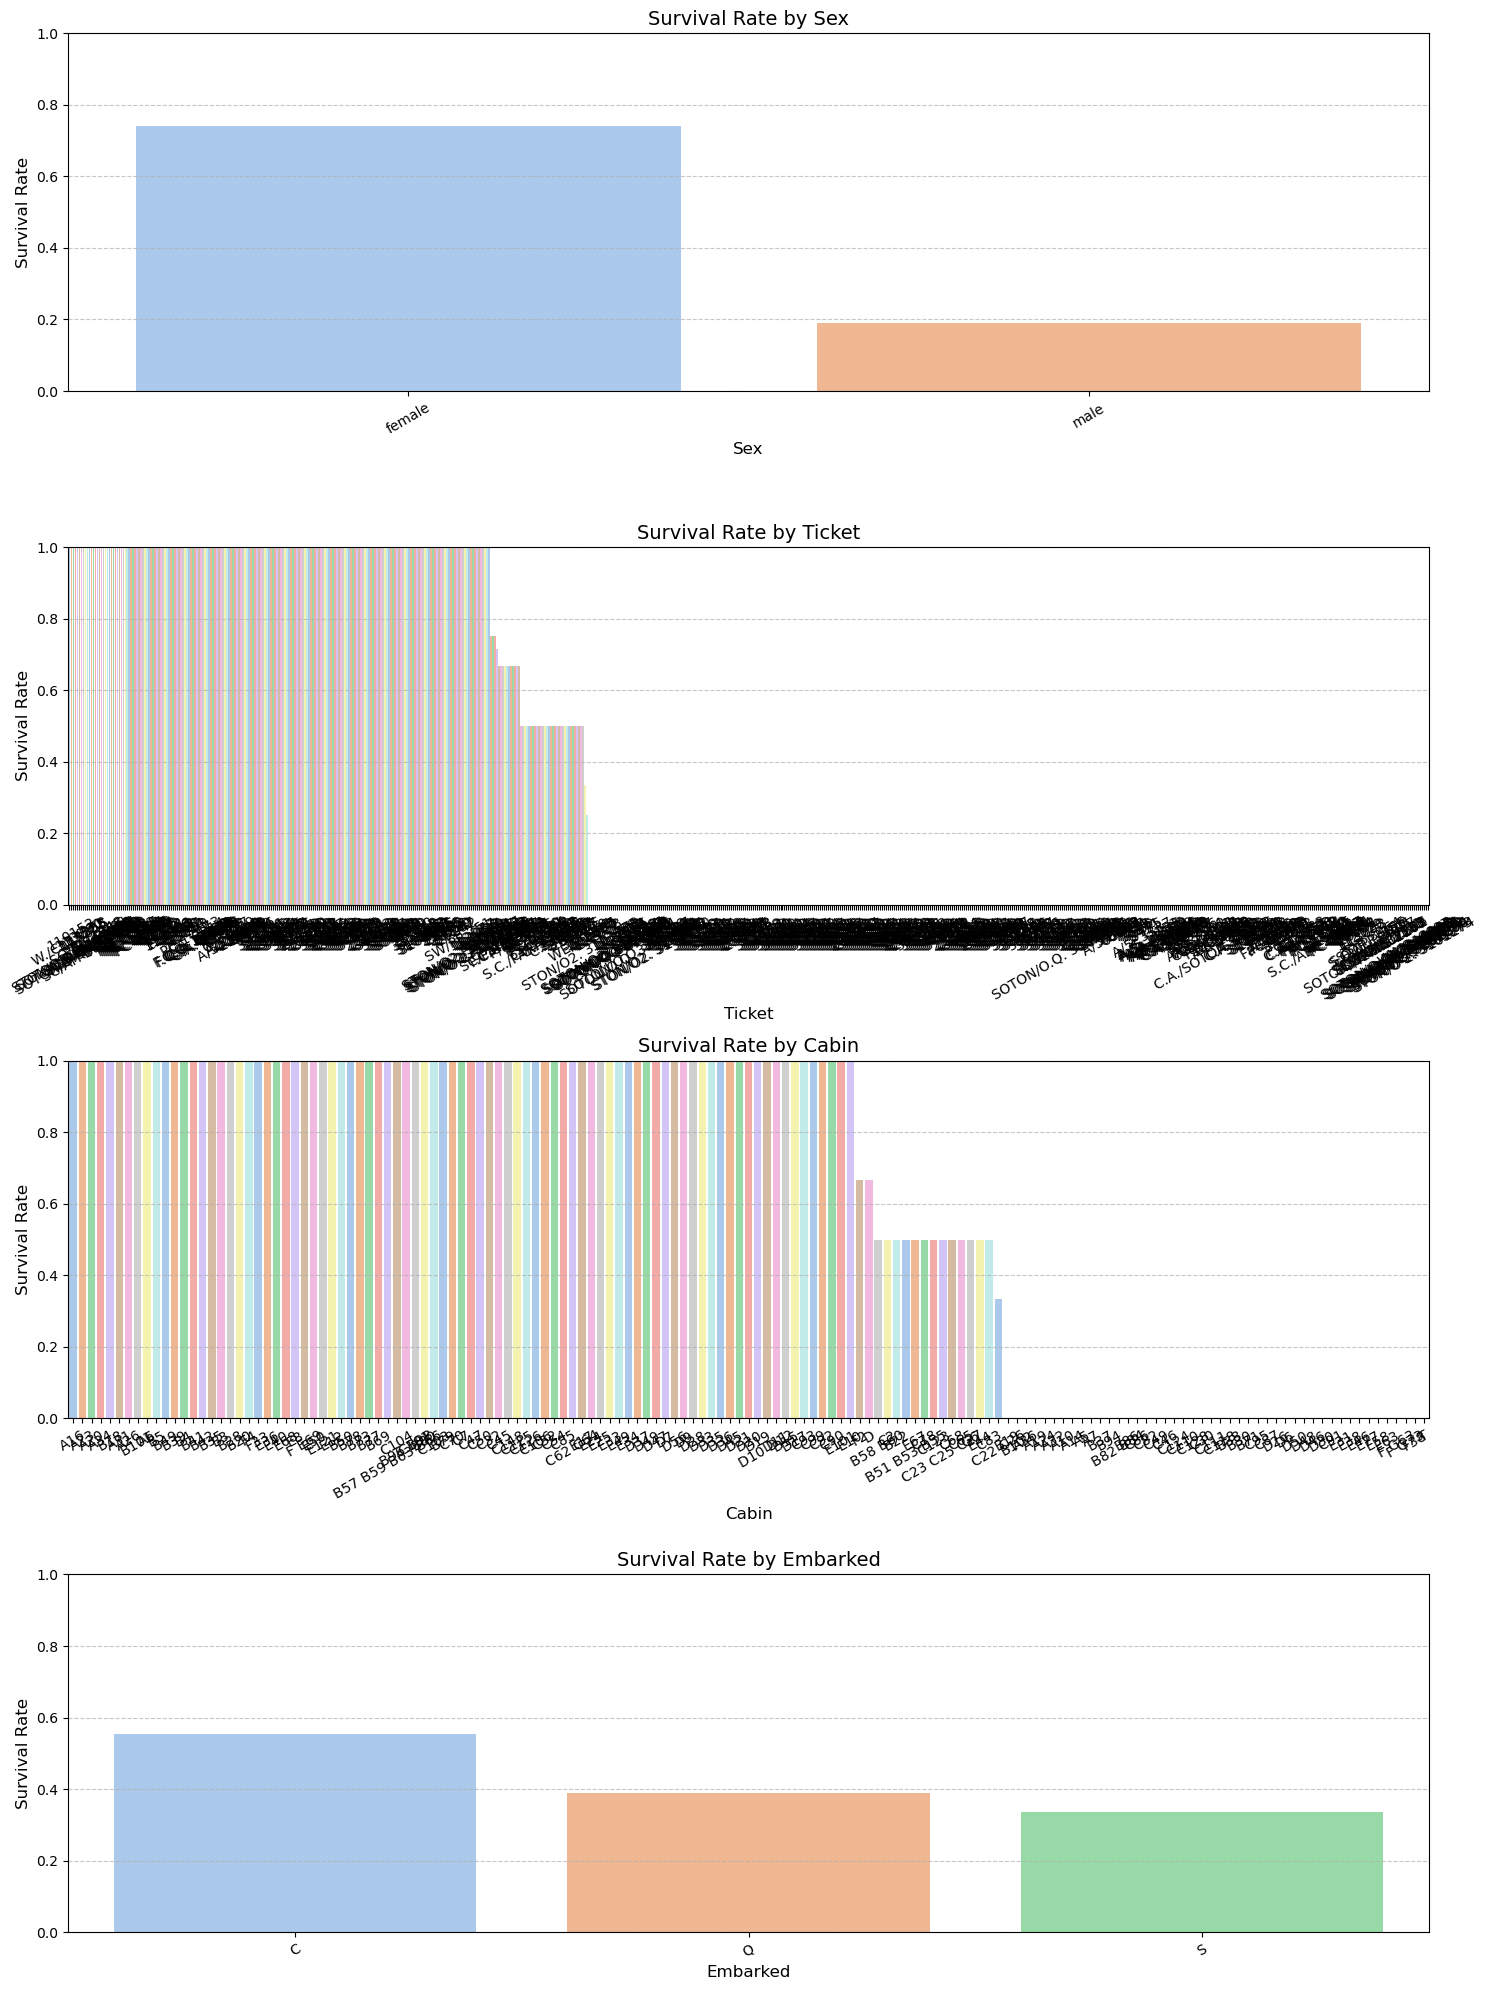

In [8]:
#QUESTION 5
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure Survived is numeric for mean calculation
df['Survived'] = df['Survived'].astype(int)

# Categorical columns excluding Name
categorical_cols = [col for col in df.select_dtypes(include="object").columns if col != "Name"]

plt.figure(figsize=(15, 5 * len(categorical_cols)))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols), 1, i)
    survival_rate = df.groupby(col)['Survived'].mean().sort_values(ascending=False)
    sns.barplot(x=survival_rate.index, y=survival_rate.values, palette="pastel")
    plt.title(f"Survival Rate by {col}", fontsize=14)
    plt.ylabel("Survival Rate", fontsize=12)
    plt.xlabel(col, fontsize=12)
    plt.ylim(0, 1)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

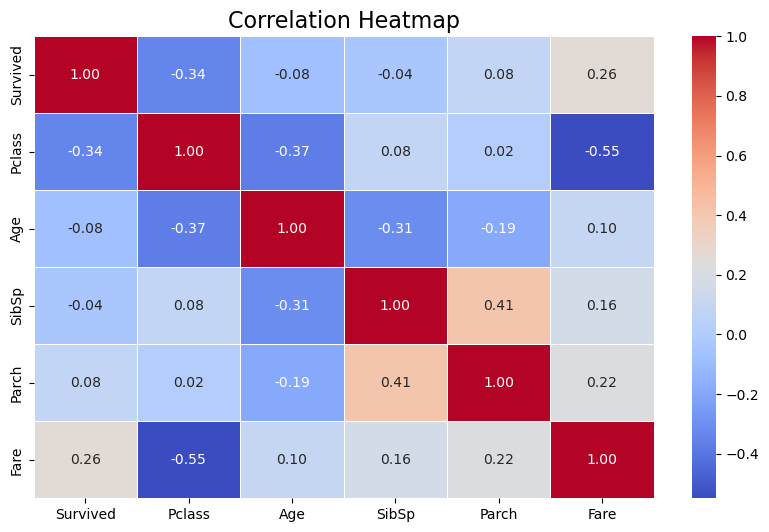

In [9]:
#QUESTION 6
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns excluding PassengerId
numeric_cols = [col for col in df.select_dtypes(include="number").columns if col != "PassengerId"]

# Compute correlation matrix
corr = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()